In [1]:
import pandas as pd

from src.algo.ga import *
from src.algo.otmto import *
from src.modeling.representation import *
from src.modeling.population import *
from src.modeling.tsp import TSP
from src.modeling.knapsack import Knapsack

In [2]:
representation = RealValueRepresentation
tasks = list()
#tasks.append(IDPCDU('data/idpc_40x80x130681.idpc', representation))
tasks.append(TSP("data/bays29.txt", representation))
tasks.append(TSP("data/eil40.txt", representation))
tasks.append(TSP("data/eil51.txt", representation))
tasks.append(Knapsack("data/knapsack50.txt", representation))

# Test DE (Differential Evolution)

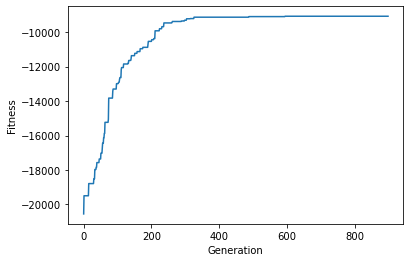

In [3]:
population = Population(400, tasks[0], representation)
population.init_pop()
population = DE(population, 900, tasks[0], representation)

9074.14804787284


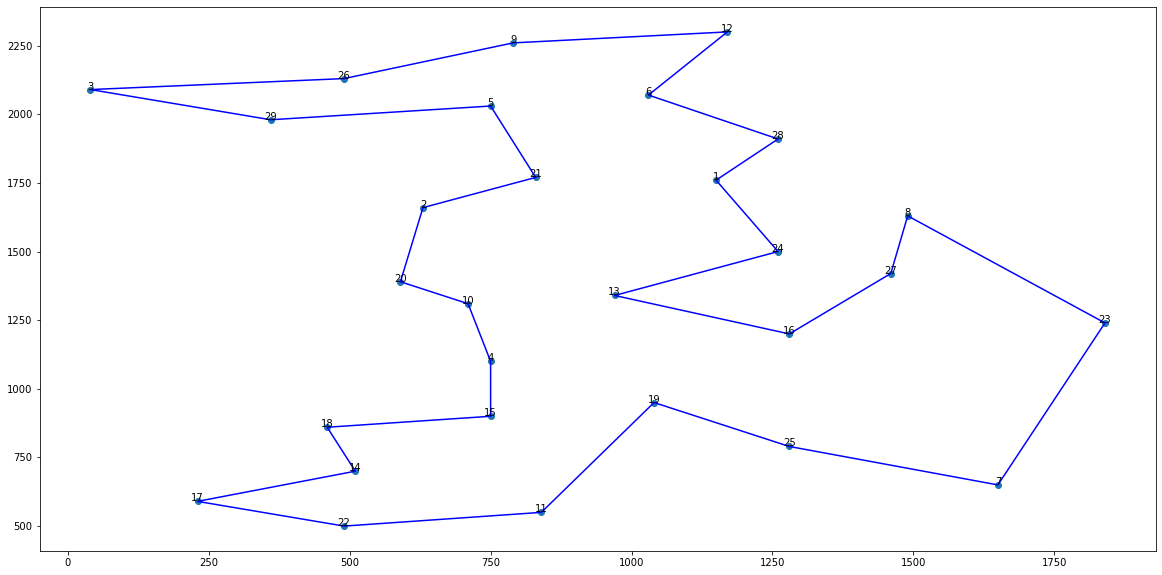

In [4]:
print(tasks[0].compute_distance(population.individuals[0]))
tasks[0].plot_route(population.individuals[0])

# OTMTO (Orthogonal Transfer for Multitask Optimization)

In [3]:
# GRID SEARCH FOR OPTIMAL PARAMETERS
from time import time
nb_l = [10, 20, 30, 35]
n_individuals_l = [100]
n_gen_l = [100, 300, 500]
max_FE_l = [100]

df = pd.DataFrame(columns=['nb', 'n_individuals', 'n_gen', 'maxFE',
                           'Task 1 : bays29', 'Task 2 : eil40', 'Task 3 : eil51', 'Task 4 : knapsack50', 'Time'])

for nb in nb_l:
    for n_individuals in n_individuals_l:
        for n_gen in n_gen_l:
            for maxFE in max_FE_l:
                start_time = time()
                otmto = OTMTO(tasks, representation=representation, maxFE_n=maxFE)
                pop = otmto.run(nb=nb, n_individuals=n_individuals, n_gen=n_gen)
                total_time = time() - start_time
                # result
                i = 0
                t1 = tasks[i].compute_distance(pop[i].individuals[0])
                i = 1
                t2 = tasks[i].compute_distance(pop[i].individuals[0])
                i = 2
                t3 = tasks[i].compute_distance(pop[i].individuals[0])
                i = 3
                t4 = tasks[i].compute_fitness(pop[i].individuals[0])
                # store
                df = df._append(pd.DataFrame({'nb' : [nb], 'n_individuals' : [n_individuals], 'n_gen' : [n_gen], 'maxFE' : [maxFE],
                                    'Task 1 : bays29' : [t1],
                                    'Task 2 : eil40' : [t2],
                                    'Task 3 : eil51' : [t3],
                                    'Task 4 : knapsack50': [t4],
                                    'Time' : [total_time]}), ignore_index=True)
                print(f"'nb' : {nb}, 'n_individuals' : {n_individuals}, 'n_gen' : {n_gen}, 'maxFE' : {maxFE}, 'Task 1 : bays29' : {t1},   'Task 2 : eil40' : {t2},   'Task 3 : eil51' : {t3},   'Task 4 : knapsack50': {t4},   'Time' : {total_time}")


/home/rhev/Works/Code/evolutionary-computing/src/utils/math.py:14: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
/home/rhev/Works/Code/evolutionary-computing/src/utils/math.py:14: RuntimeWarning: invalid value encountered in multiply
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
/tmp/ipykernel_27692/3327414963.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append(pd.DataFrame({'nb' : [nb], 'n_individuals' : [n_individuals], 'n_gen' : [n_gen], 'maxFE' : [maxFE],


'nb' : 10, 'n_individuals' : 100, 'n_gen' : 100, 'maxFE' : 100, 'Task 1 : bays29' : 10127.655527645064,   'Task 2 : eil40' : 478.29856493619354,   'Task 3 : eil51' : 565.4753938867863,   'Task 4 : knapsack50': 23165,   'Time' : 68.57506442070007
'nb' : 10, 'n_individuals' : 100, 'n_gen' : 300, 'maxFE' : 100, 'Task 1 : bays29' : 9643.66688128768,   'Task 2 : eil40' : 389.96324801326017,   'Task 3 : eil51' : 523.5163902441135,   'Task 4 : knapsack50': 23242,   'Time' : 131.90219688415527


/home/rhev/Works/Code/evolutionary-computing/src/utils/math.py:14: RuntimeWarning: divide by zero encountered in divide
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
/home/rhev/Works/Code/evolutionary-computing/src/utils/math.py:14: RuntimeWarning: overflow encountered in divide
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))
/home/rhev/Works/Code/evolutionary-computing/src/utils/math.py:14: RuntimeWarning: invalid value encountered in divide
  return np.sum(np.where(p != 0, p * np.log(p / q), 0))


'nb' : 10, 'n_individuals' : 100, 'n_gen' : 500, 'maxFE' : 100, 'Task 1 : bays29' : 10367.513552952329,   'Task 2 : eil40' : 457.0115688937341,   'Task 3 : eil51' : 478.89628782243733,   'Task 4 : knapsack50': 23380,   'Time' : 96.11211204528809
'nb' : 20, 'n_individuals' : 100, 'n_gen' : 100, 'maxFE' : 100, 'Task 1 : bays29' : 9210.637948056072,   'Task 2 : eil40' : 473.89092202757513,   'Task 3 : eil51' : 641.1057349075644,   'Task 4 : knapsack50': 23099,   'Time' : 125.75925827026367
'nb' : 20, 'n_individuals' : 100, 'n_gen' : 300, 'maxFE' : 100, 'Task 1 : bays29' : 11085.645732514513,   'Task 2 : eil40' : 383.4747668275636,   'Task 3 : eil51' : 582.8270054212209,   'Task 4 : knapsack50': 23330,   'Time' : 57.764631032943726
'nb' : 20, 'n_individuals' : 100, 'n_gen' : 500, 'maxFE' : 100, 'Task 1 : bays29' : 9802.940167807705,   'Task 2 : eil40' : 438.6018217684632,   'Task 3 : eil51' : 554.6066420168432,   'Task 4 : knapsack50': 23299,   'Time' : 55.486186265945435
'nb' : 30, 'n_ind

In [4]:
nb = 35
n_individuals = 100
n_gen = 500
maxFE = 100
for i in range(3):
    start_time = time()
    otmto = OTMTO(tasks, representation=representation, maxFE_n=maxFE)
    pop = otmto.run(nb=nb, n_individuals=n_individuals, n_gen=n_gen)
    total_time = time() - start_time
    # result
    i = 0
    t1 = tasks[i].compute_distance(pop[i].individuals[0])
    i = 1
    t2 = tasks[i].compute_distance(pop[i].individuals[0])
    i = 2
    t3 = tasks[i].compute_distance(pop[i].individuals[0])
    i = 3
    t4 = tasks[i].compute_fitness(pop[i].individuals[0])
    # store
    df = df._append(pd.DataFrame({'nb' : [nb], 'n_individuals' : [n_individuals], 'n_gen' : [n_gen], 'maxFE' : [maxFE],
                                    'Task 1 : bays29' : [t1],
                                    'Task 2 : eil40' : [t2],
                                    'Task 3 : eil51' : [t3],
                                    'Task 4 : knapsack50': [t4],
                                    'Time' : [total_time]}), ignore_index=True)
    print(f"'nb' : {nb}, 'n_individuals' : {n_individuals}, 'n_gen' : {n_gen}, 'maxFE' : {maxFE}, 'Task 1 : bays29' : {t1},   'Task 2 : eil40' : {t2},   'Task 3 : eil51' : {t3},   'Task 4 : knapsack50': {t4},   'Time' : {total_time}")

'nb' : 35, 'n_individuals' : 100, 'n_gen' : 500, 'maxFE' : 100, 'Task 1 : bays29' : 10310.766966793484,   'Task 2 : eil40' : 445.8297921783323,   'Task 3 : eil51' : 534.2365976225913,   'Task 4 : knapsack50': 23360,   'Time' : 250.49361324310303
'nb' : 35, 'n_individuals' : 100, 'n_gen' : 500, 'maxFE' : 100, 'Task 1 : bays29' : 10063.543275248925,   'Task 2 : eil40' : 485.5221525021707,   'Task 3 : eil51' : 570.6126458619269,   'Task 4 : knapsack50': 22982,   'Time' : 184.34393548965454
'nb' : 35, 'n_individuals' : 100, 'n_gen' : 500, 'maxFE' : 100, 'Task 1 : bays29' : 9642.338896045638,   'Task 2 : eil40' : 436.7496052685371,   'Task 3 : eil51' : 497.83271273768037,   'Task 4 : knapsack50': 23446,   'Time' : 131.5110273361206


In [5]:
df.to_csv(r'eval.csv')

497.83271273768037


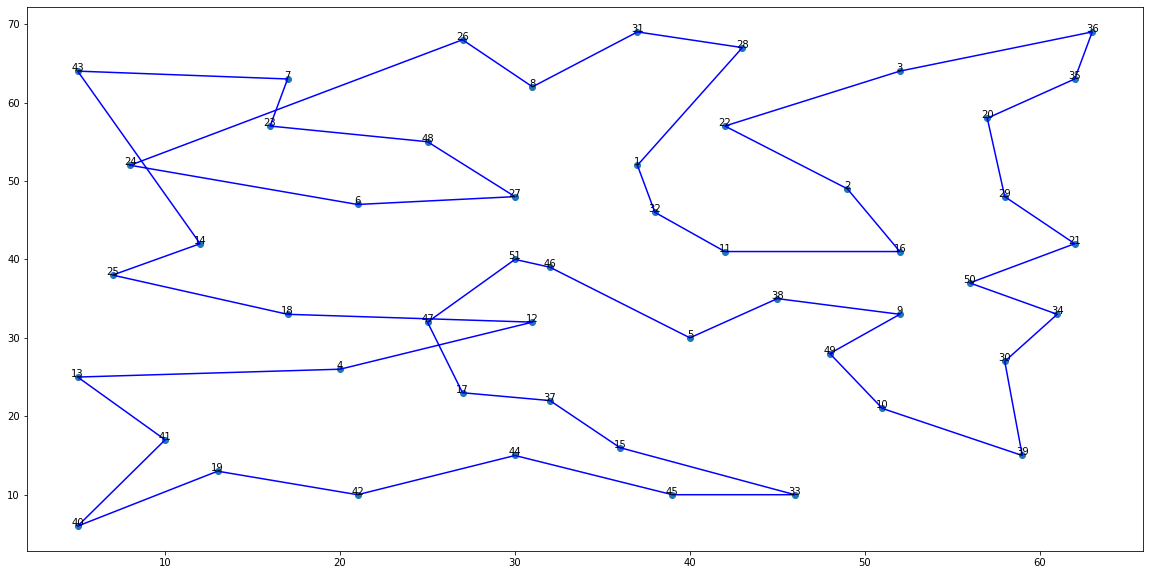

In [6]:
i = 2
print(tasks[i].compute_distance(pop[i].individuals[0]))
tasks[i].plot_route(pop[i].individuals[0])